In [1]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [2]:
def remove_punctuation(text):
    #remove punctuation from text
    # return text without punctuation
    ans=""  
    for i in text:     
        if i not in string.punctuation:
            ans+=i    
    return ans

In [6]:
train_df = pd.read_csv('train.tsv', sep='\t', quoting=csv.QUOTE_NONE)

In [7]:
def generate_N_grams(text,ngram=1):
    # generate a dictionary with n-grams
    # return a dictionary with n-grams
    dict_val = {}
    count = 1
    for i in range(text.shape[0]):
        a = ' '.join(list(text[i:ngram +i]))
        if a in dict_val.keys():
            dict_val[a] += 1
        else:
            dict_val[a] = 1
    return dict_val
        

In [8]:
train_df['token']= train_df['token'].apply(lambda x:remove_punctuation(x))


In [9]:
new_tr_df = train_df.set_index('token').drop('')
new_tr_df = new_tr_df.reset_index()

In [10]:
def max_10(c):
    # gives the max 10 values of a dictionary
    # returns two lists: first for values, second for the key of the value
    list_a = []
    list_b = []
    for a in c:
        if len(list_a) == 10:
            if c[a] > np.min(list_a):
                index = list_a.index(np.min(list_a))
                list_a.remove(np.min(list_a))
                list_b.remove(list_b[index])
                list_a.append(c[a])
                list_b.append(a)
        else:
            list_a.append(c[a])
            list_b.append(a)
    return list_a, list_b

    

In [11]:
n_gram_1 = generate_N_grams(new_tr_df['token'], ngram = 1)
a,b = max_10(n_gram_1)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  antialiased or aa: unknown
  bounds: (left, bottom, width, height)
  capstyle: {'butt', 'round', 'projecting'}
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color: color
  contains: unknown
  edgecolor or ec: color or None or 'auto'
  facecolor or fc: color or None
  figure: `.Figure`
  fill: bool
  gid: str
  hatch: {'/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}
  height: unknown
  in_layout: bool
  joinstyle: {'miter', 'round', 'bevel'}
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float or None
  path_effects: `.AbstractPathEffect`
  picker: None or bool or callable
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  snap: bool or None
  transform: `.Transform`
  url: str
  visibl

Text(0.5, 1.0, 'Top 10 phrases of unigrams in dataframe')

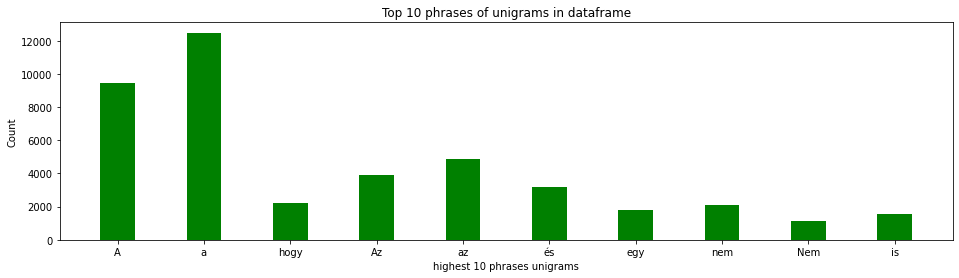

In [12]:
plt.figure(1,figsize=(16,4))
bar_p = plt.bar(b,a, color ='green',
        width = 0.4)
plt.setp(bar_p)
plt.xlabel("highest 10 phrases unigrams")
plt.ylabel("Count")
plt.title("Top 10 phrases of unigrams in dataframe")

In [13]:
n_gram_2 = generate_N_grams(new_tr_df['token'], ngram = 2)
a,b = max_10(n_gram_2)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  antialiased or aa: unknown
  bounds: (left, bottom, width, height)
  capstyle: {'butt', 'round', 'projecting'}
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color: color
  contains: unknown
  edgecolor or ec: color or None or 'auto'
  facecolor or fc: color or None
  figure: `.Figure`
  fill: bool
  gid: str
  hatch: {'/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}
  height: unknown
  in_layout: bool
  joinstyle: {'miter', 'round', 'bevel'}
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float or None
  path_effects: `.AbstractPathEffect`
  picker: None or bool or callable
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  snap: bool or None
  transform: `.Transform`
  url: str
  visibl

Text(0.5, 1.0, 'Top 10 phrases of bigrams in dataframe')

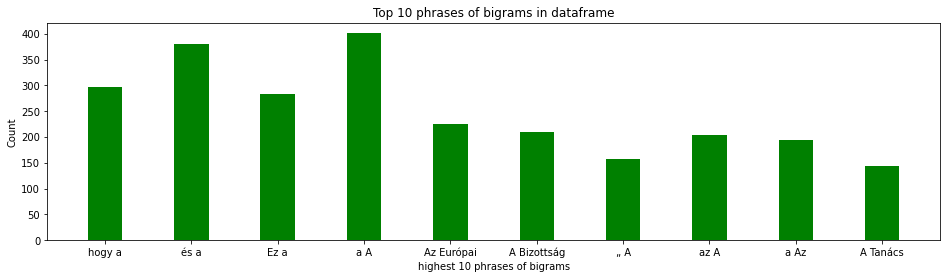

In [14]:
plt.figure(1,figsize=(16,4))
bar_p = plt.bar(b,a, color ='green',
        width = 0.4)
plt.setp(bar_p)
plt.xlabel("highest 10 phrases of bigrams")
plt.ylabel("Count")
plt.title("Top 10 phrases of bigrams in dataframe")

In [15]:
n_gram_3 = generate_N_grams(new_tr_df['token'], ngram = 3)
a,b = max_10(n_gram_3)

In [18]:
b

['A mérkőzést a',
 'a Magyar Tudományos',
 'Magyar Tudományos Akadémia',
 'Tudományos Akadémia levelező',
 '290 községének egyike',
 'Az Európai Parlament',
 'Az Európai Unió',
 'Ez a rendelet',
 'rendelet az Európai',
 'hogy a A']

In [22]:
n_gram_4 = generate_N_grams(new_tr_df['token'], ngram = 4)
a,b = max_10(n_gram_4)

In [23]:
b

['csapatában mutatkozott az élvonalban',
 'a Magyar Tudományos Akadémia',
 'Magyar Tudományos Akadémia levelező',
 'Fel nem használt cserék',
 'község Svédország 290 községének',
 'Svédország 290 községének egyike',
 'Ez a rendelet az',
 'a rendelet az Európai',
 'csapat vett részt a',
 'vett részt a győztes']